In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import Perceptron

In [2]:
df=pd.read_csv("data/placement.csv")

In [3]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [5]:
import seaborn as sns

<Axes: xlabel='cgpa', ylabel='resume_score'>

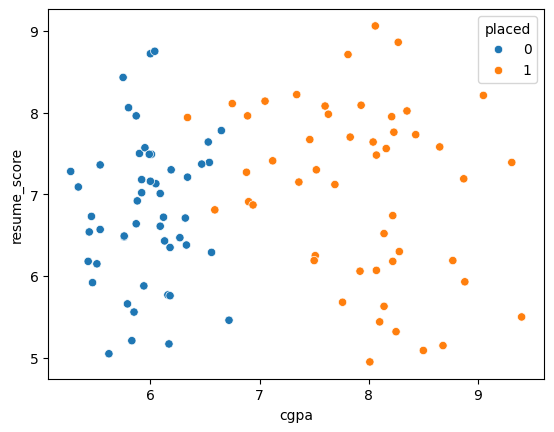

In [6]:
sns.scatterplot(data=df,x="cgpa", y="resume_score",hue="placed")

In [9]:
p=Perceptron()

In [11]:
X=df.drop(columns=["placed"], axis=1)
y=df["placed"]

In [13]:
p.fit(X, y)

Perceptron()

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

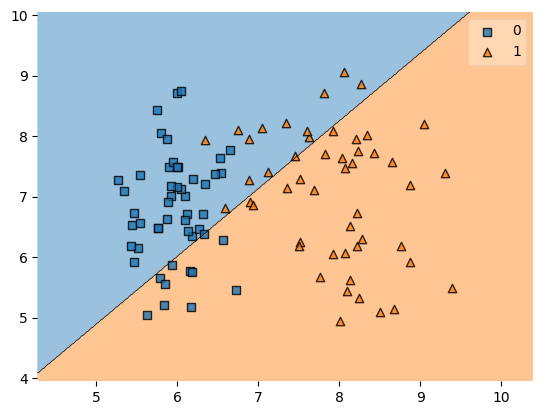

In [14]:
plot_decision_regions(X.values, y.values,clf=p)

In [16]:
from sklearn.datasets import make_classification

In [28]:
X, y = make_classification(
    n_samples=100, 
    n_features=3, 
    n_informative=3, 
    n_redundant=0,
    n_classes=2, 
    n_clusters_per_class=1, 
    random_state=41, 
    hypercube=False, 
    class_sep=10
)

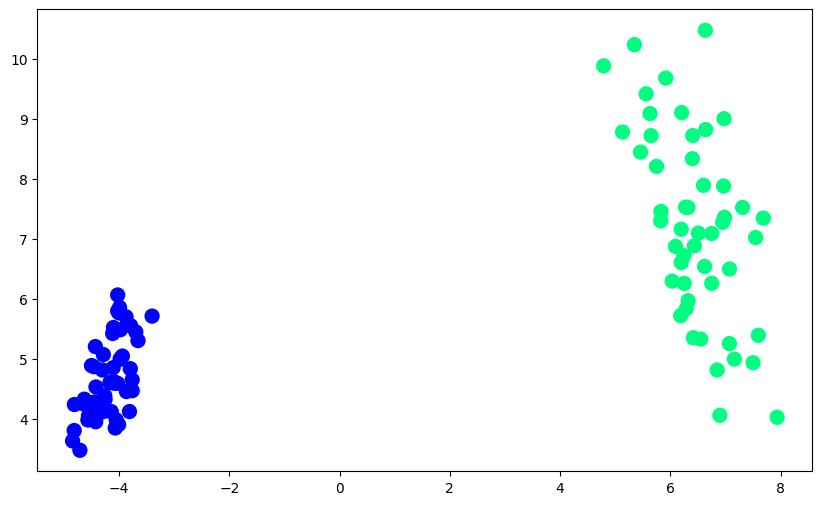

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [30]:
p.fit(X, y)

Perceptron()

In [32]:
plot_decision_regions(X.values, y.values,clf=p)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [36]:
y

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

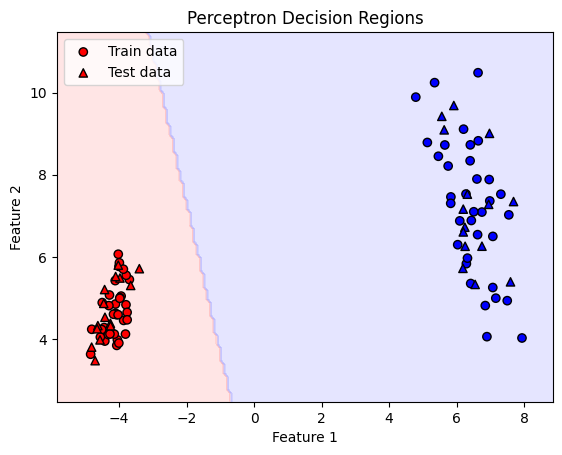

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Step 1: Generate dataset
X, y = make_classification(
    n_samples=100, 
    n_features=3, 
    n_informative=3, 
    n_redundant=0,
    n_classes=2, 
    n_clusters_per_class=1, 
    random_state=41, 
    hypercube=False, 
    class_sep=10
)

# Since the data has 3 features, we will use the first 2 features to plot the decision regions
X = X[:, :2]

# Step 2: Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Step 3: Train a Perceptron model
model = Perceptron()
model.fit(X_train, y_train)

# Step 4: Create a mesh grid for plotting the decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Step 5: Predict using the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6: Plot decision regions
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolors='k', marker='o', label='Train data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, edgecolors='k', marker='^', label='Test data')

plt.title("Perceptron Decision Regions")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


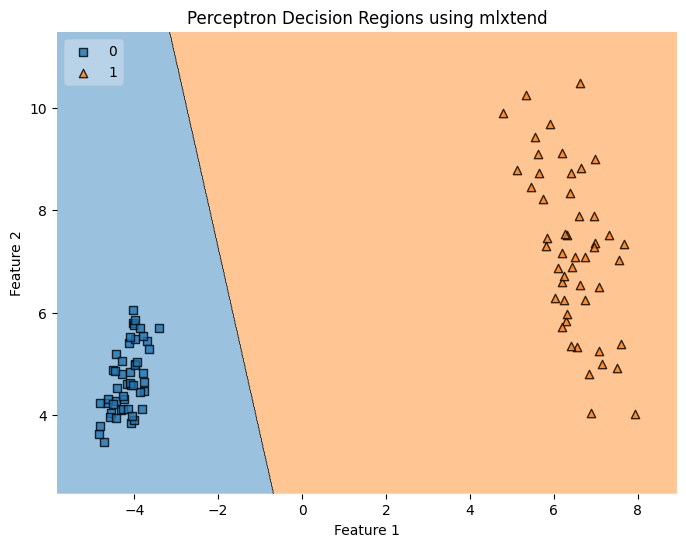

In [38]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Generate the dataset
X, y = make_classification(
    n_samples=100, 
    n_features=3, 
    n_informative=3, 
    n_redundant=0,
    n_classes=2, 
    n_clusters_per_class=1, 
    random_state=41, 
    hypercube=False, 
    class_sep=10
)

# Use only the first 2 features for 2D plotting
X = X[:, :2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Train the Perceptron
clf = Perceptron()
clf.fit(X_train, y_train)

# Plot decision regions
plt.figure(figsize=(8,6))
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

plt.title("Perceptron Decision Regions using mlxtend")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


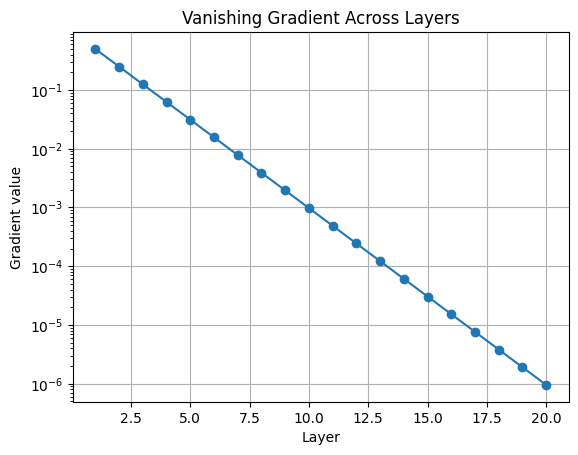

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate gradient passing through 20 layers
layers = 20
grads = []
gradient = 1.0

for _ in range(layers):
    gradient *= 0.5  # Simulate sigmoid-like derivative
    grads.append(gradient)

plt.plot(range(1, layers + 1), grads, marker='o')
plt.xlabel('Layer')
plt.ylabel('Gradient value')
plt.title('Vanishing Gradient Across Layers')
plt.yscale('log')
plt.grid(True)
plt.show()
